In [1]:
import os
import os.path as osp
import pandas as pd
import numpy as np
from snorkel import SnorkelSession
from tcre.env import *
from tcre.supervision import *
from tcre.modeling import utils
from tcre.modeling import features
%matplotlib inline
session = SnorkelSession()
classes = get_candidate_classes()

In [2]:
from snorkel.models import Candidate, GoldLabel
candidate_class = classes.inducing_cytokine
cands = session.query(candidate_class.subclass)\
    .filter(candidate_class.subclass.split == SPLIT_DEV).all()
len(cands)

673

In [3]:
from tcre.modeling import features

In [5]:
cands[0].get_contexts()


(Span("b'IL-12'", sentence=13515, chars=[0,4], words=[0,0]),
 Span("b'TH1'", sentence=13515, chars=[122,124], words=[21,21]))

In [31]:
import imp
imp.reload(features)

<module 'tcre.modeling.features' from '/lab/repos/t-cell-relation-extraction/src/tcre/modeling/features.py'>

In [17]:
import spacy
nlp = spacy.load('en_core_sci_md')

In [32]:
pd.set_option('display.max_colwidth', 250)
markers = ['<<', '>>', '[[', ']]']
#df = features.get_record_features(features.candidates_to_records(cands), markers=markers)
df = features.get_record_features(features.candidates_to_records(cands)[:10], markers=markers, subtokenizer=lambda t: [str(v) for v in nlp(t)])

df.head()

,id,label,e0_dist,e0_text,e1_dist,e1_text,token_indices,tokens,word_indices
0,30167,1,"[-1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 22, 23, 24, 24, 25, 26, 27]",IL-12,"[-24, -24, -23, -22, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4]",TH1,"[0, 0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 23, 24, 25, 25, 26, 27, 28]","[<, <, IL-12, >, >, induces, not, only, Ifng, expression1, but, also, T, -, bet, ,, , which, promotes, the, survival, and, proliferation, of, differentiating, [, [, TH1, ], ], cells, ., ]","[None, None, 0, None, None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None, None, 21, None, None, 22, 23, 24]"
1,30168,0,"[-5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 18, 19, 20, 20, 21, 22, 23]",Ifng,"[-24, -23, -22, -21, -20, -20, -19, -18, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4]",TH1,"[0, 1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 23, 24, 25, 25, 26, 27, 28]","[IL-12, induces, not, only, <, <, Ifng, >, >, expression1, but, also, T, -, bet, ,, , which, promotes, the, survival, and, proliferation, of, differentiating, [, [, TH1, ], ], cells, ., ]","[0, 1, 2, 3, None, None, 4, None, None, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None, None, 21, None, None, 22, 23, 24]"
2,30169,1,"[-4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 18, 19, 20, 20, 21, 22, 23, 24, 25]",TGFβ,"[-23, -22, -21, -20, -20, -19, -18, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6]",Th17,"[0, 1, 2, 3, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 22, 23, 24, 24, 25, 26, 27, 28, 29]","[In, mice, ,, <, <, TGFβ, >, >, together, with, IL6, can, activate, antigen, -, responsive, naïve, CD4, +, T, cells, to, develop, into, [, [, Th17, ], ], cells, [, 39, ], .]","[0, 1, 2, None, None, 3, None, None, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None, None, 20, None, None, 21, 22, 23, 24, 25]"
3,30170,1,"[-7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 16, 17, 17, 18, 19, 20, 21, 22]",IL6,"[-23, -22, -21, -20, -19, -18, -17, -17, -16, -15, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6]",Th17,"[0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 22, 23, 24, 24, 25, 26, 27, 28, 29]","[In, mice, ,, TGFβ, together, with, <, <, IL6, >, >, can, activate, antigen, -, responsive, naïve, CD4, +, T, cells, to, develop, into, [, [, Th17, ], ], cells, [, 39, ], .]","[0, 1, 2, 3, 4, 5, None, None, 6, None, None, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None, None, 20, None, None, 21, 22, 23, 24, 25]"
4,30171,0,"[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -6, -5, -4, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]",IL-12,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]",Th1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11, 11, 12, 13, 14, 14, 15, 16, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]","[Several, findings, suggest, that, during, the, initiation, of, a, [, [, Th1, ], ], response, ,, <, <, IL-12, >, >, is, produced, particularly, by, macrophages, in, response, to, certain, microbial, antigens, ,, while, NK, cells, are, the, main, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, None, None, 9, None, None, 10, 11, None, None,

In [76]:
from tcre.modeling import data as tcre_data

In [84]:
fields = {
    'text': txd.Field(lower=False, fix_length=128, include_lengths=True, tokenize=lambda seq: list(map(str, nlp(seq)))),
    'label': txd.Field(sequential=False)
}
dfds = tcre_data.DataFrameDataset(df, fields)
fields['label'].build_vocab(dfds)

In [85]:
ds_train, ds_val = dfds.split(stratified=True, strata_field='label')

In [86]:
fields['text'].vocab = w2vocab

In [90]:
next(iter(Iterator(ds_train, 10))).text[0].t()

tensor([[   129,      3, 184891,  ...,      0,      0,      0],
        [ 14186,   5830,     51,  ...,      0,      0,      0],
        [ 19664,     87,    937,  ...,      0,      0,      0],
        ...,
        [ 30981,      5,      2,  ...,      0,      0,      0],
        [    34,    212,      3,  ...,      0,      0,      0],
        [ 19664,      9, 265456,  ...,      0,      0,      0]])

In [30]:
df['label'].value_counts()

0    494
1    179
Name: label, dtype: int64

In [31]:
df[['text', 'label']].to_csv('/tmp/data.csv', index=False)

In [32]:
from torchtext import data as txd
TEXT = txd.Field(lower=False, fix_length=128, include_lengths=True, tokenize=lambda seq: list(map(str, nlp(seq))))
LABEL = txd.Field(sequential=False)
# POS1 = txd.Field(sequential=False)
# POS2 = txd.Field(sequential=False)

In [6]:
import word2vec
w2v_model = word2vec.load(W2V_MODEL_01)

/opt/conda/envs/nlp/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# from torchtext.vocab import Vectors
# vectors = Vectors(name=W2V_MODEL_01, cache='/lab/data/word2vec')

In [8]:
import torch
import numpy as np
from torchtext.vocab import Vocab
from collections import defaultdict, Counter
    
class W2VVocab(Vocab):
    
    def __init__(self, model, specials=['<pad>'], unk_init=np.zeros):
        super().__init__(Counter())
        self.itos = specials + list(model.vocab)
        
        unk_index = model.ix('UNK')
        def get_unk_index():
            return unk_index
        self.stoi = defaultdict(get_unk_index)
        self.stoi.update({w: i for i, w in enumerate(self.itos)})
        self.vectors = torch.cat([
            torch.FloatTensor(np.zeros((len(specials), model.vectors.shape[1]))),
            torch.FloatTensor(model.vectors)
        ], dim=0)
        
w2vocab = W2VVocab(w2v_model)

In [33]:
TEXT.vocab = w2vocab

In [34]:
# vocab = TEXT.vocab
# self.embed = nn.Embedding(len(vocab), emb_dim)
# self.embed.weight.data.copy_(vocab.vectors)

In [35]:
#??TEXT.pad

In [36]:
#TEXT.process([['I', 'went', 'somewhere']])

In [37]:
# ds = txd.TabularDataset('/tmp/data.csv', fields=[('text', TEXT), ('label', LABEL)], format='csv', skip_header=True)
# LABEL.build_vocab(ds)

In [38]:
ds_train, ds_val = ds.split(stratified=True, strata_field='label')

In [39]:
len(ds_train), len(ds_val)

(471, 202)

In [40]:
pd.Series(list(ds_val.label)).value_counts(), pd.Series(list(ds_train.label)).value_counts()

(0    148
 1     54
 dtype: int64, 0    346
 1    125
 dtype: int64)

In [41]:
from torchtext.data import Iterator, BucketIterator
train_iter, val_iter = BucketIterator.splits(
    (ds_train, ds_val), # we pass in the datasets we want the iterator to draw data from
    batch_sizes=(32, 32),
    sort_key=lambda x: len(x.text), # the BucketIterator needs to be told what function it should use to group the data.
    sort_within_batch=True,
    repeat=False, # we pass repeat=False because we want to wrap this Iterator layer.d
    device='cuda'
)
#ds_iter = txd.Iterator(ds, 10, sort_within_batch=True, sort_key=lambda x: len(x.text), device='cuda')

In [42]:
b = next(iter(train_iter))

In [43]:
b.text[0].t()

tensor([[4981, 5018,  324,  ...,    2,   70,  901],
        [ 979, 9082, 1293,  ...,    0,    0,    0],
        [ 979, 9082, 1293,  ...,    0,    0,    0],
        ...,
        [ 193,  653,    3,  ...,    0,    0,    0],
        [ 193,  653,    3,  ...,    0,    0,    0],
        [ 193,  653,    3,  ...,    0,    0,    0]], device='cuda:0')

In [63]:
# for t in nlp(str(ds.examples[0].text)):
#     print(t)

In [84]:
b.fields

dict_keys(['text', 'label'])

In [90]:
b.dataset.fields

{'text': <torchtext.data.field.Field at 0x7f716f590be0>,
 'label': <torchtext.data.field.Field at 0x7f716f590898>}

### Set Model

In [44]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence
import torch.optim as optim

In [46]:
class RNN(nn.Module):

    def __init__(self, fields, cardinality=2, hidden_dim=50, num_layers=1, cell_type=nn.LSTM, 
                 dropout=0, bidirectional=False, device=None, names=['text', 'label']):
        super().__init__()
        self.fields = fields
        self.cardinality = cardinality
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.cell_type = cell_type
        self.device = device
        self.names = names
        
        self._init_embedding()
        self._init_cell()
        self.output = nn.Linear(self.hidden_dim * self.num_directions, self.cardinality if self.cardinality > 2 else 1)
        self.dropout = nn.Dropout(p=dropout)
        
    def _init_embedding(self):
        vectors = self.fields[self.names[0]].vocab.vectors
        self.embedding = nn.Embedding.from_pretrained(vectors, padding_idx=0)
        self.embedding.weight.requires_grad = False
        self.embedding_shape = tuple(vectors.shape)
        
    def _init_cell(self):
        self.cell = self.cell_type(
            self.embedding_shape[1], self.hidden_dim,
            num_layers=self.num_layers, bidirectional=self.bidirectional,
            dropout=self.dropout, batch_first=True
        )

    def prepare(self, batch, **kwargs):
        """Extract seq token indices, seq lengths, and training labels"""
        text, label = [getattr(batch, n) if n in batch.fields else None for n in self.names]
        X, L = text[0].t(), text[1]
        Y = None if label is None else (label - 1).type(torch.FloatTensor).to(self.device)
        return (X.to(self.device), L.to(self.device)), Y
    
    def transform(self, Y):
        return torch.sigmoid(Y) if self.cardinality == 2 else torch.softmax(Y)

    def classify(self, Y):
        return torch.round(Y) if self.cardinality == 2 else torch.argmax(Y, dim=0)
    
    def forward(self, features):
        X, L = features
        H = self.initial_hidden_state(len(X))
        X = self.embedding(X)
        L = L.view(-1).tolist()
        X = nn.utils.rnn.pack_padded_sequence(X, L, batch_first=True)    
        ht = self.cell(X, H)[1]
        ht = ht[0] if isinstance(ht, tuple) else ht
        Y = ht[-1] if self.num_directions == 1 else torch.cat((ht[0], ht[1]), dim=1)
        Y = self.output(self.dropout(Y))
        return Y.view(-1) if self.cardinality == 2 else Y

    def initial_hidden_state(self, batch_size):
        def get_h0():
            return torch.zeros(self.num_layers * self.num_directions, batch_size, self.hidden_dim).to(self.device) 
        
        if self.cell_type == nn.GRU:
            return get_h0()
        elif self.cell_type == nn.LSTM:
            return tuple([get_h0(), get_h0()])
        else:
            raise ValueError(f'RNN type {self.cell_type.__name__} not supported')

#model = RNN(ds.fields, dropout=0, hidden_dim=30, bidirectional=True, device='cuda') # underfit
#model = RNN(ds.fields, dropout=0, hidden_dim=100, bidirectional=True, device='cuda') # mild overfitting
model = RNN(ds.fields, dropout=0, hidden_dim=100, bidirectional=False, device='cuda', cell_type=nn.GRU) 

In [ ]:
# output, hn = rnn(input, h0
# output, (hn, cn) 
#nn.LSTM()

In [45]:
del model
torch.cuda.empty_cache()

In [47]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from ignite.contrib.handlers.param_scheduler import LRScheduler

optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad], .01)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.25, patience=25, threshold=0.01, verbose=True)
criterion = nn.BCEWithLogitsLoss()

In [48]:
from ignite.engine import Events, Engine, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss, Precision, Recall, Metric, MetricsLambda
from ignite.handlers import EarlyStopping

trainer = create_supervised_trainer(
    model, optimizer, criterion, 
    device=model.device, prepare_batch=model.prepare
)

def F1(r, p):
        return 2 * (p * r) / (p + r + 1e-20)

def get_metrics():
    metrics = {
        'accuracy': Accuracy(), 
        'precision': Precision(average=False),
        'recall': Recall(average=False),
        'loss': Loss(criterion)
    }
    metrics['f1'] = MetricsLambda(F1, metrics['recall'], metrics['precision'])
    return metrics

def get_evaluator():
    return create_supervised_evaluator(
        model, metrics=get_metrics(), prepare_batch=model.prepare, device=model.device,
        output_transform=lambda x, y, y_pred: (model.classify(model.transform(y_pred)), y)
    )
train_evaluator = get_evaluator()
val_evaluator = get_evaluator()

def score_function(engine):
    return -engine.state.metrics['loss']

handler = EarlyStopping(patience=50, score_function=score_function, trainer=trainer)
val_evaluator.add_event_handler(Events.EPOCH_COMPLETED, handler)
    
history = []

@trainer.on(Events.ITERATION_COMPLETED)
def log_training_loss(engine):
    if engine.state.iteration % 10 == 0:
        lr = optimizer.param_groups[0]['lr']
        print("Epoch[{}] Iteration[{}] Loss: {:.4f} LR: {}".format(engine.state.epoch, engine.state.iteration, engine.state.output, lr))

def log_results(engine, iterator, dataset_type, epoch):
    engine.run(iterator)
    metrics = dict(engine.state.metrics)
    precision, recall = metrics['precision'], metrics['recall']
    metrics['ct'] = len(iterator.dataset)
    metrics['lr'] = optimizer.param_groups[0]['lr']
    record = {**metrics, **{'type': dataset_type.title(), 'epoch': epoch}}
    history.append(record)
    print('{type} Results - Epoch: {epoch}  Count: {ct} Loss: {loss:.2f} Accuracy: {accuracy:.3f} F1: {f1:.3f}'.format(**record))
    return metrics
    
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(engine):
    epoch = engine.state.epoch
    metric = log_results(train_evaluator, train_iter, 'training', epoch)['loss']
    # scheduler.step(metric)
    metric = log_results(val_evaluator, val_iter, 'validation', epoch)['f1']
    scheduler.step(metric) 

In [49]:
trainer.run(train_iter, max_epochs=250)

Epoch[1] Iteration[10] Loss: 0.3674 LR: 0.01
Training Results - Epoch: 1  Count: 471 Loss: 1.05 Accuracy: 0.265 F1: 0.419
Validation Results - Epoch: 1  Count: 202 Loss: 1.05 Accuracy: 0.267 F1: 0.422
Epoch[2] Iteration[20] Loss: 0.9211 LR: 0.01
Epoch[2] Iteration[30] Loss: 0.3370 LR: 0.01
Training Results - Epoch: 2  Count: 471 Loss: 0.69 Accuracy: 0.735 F1: 0.000
Validation Results - Epoch: 2  Count: 202 Loss: 0.69 Accuracy: 0.733 F1: 0.000
Epoch[3] Iteration[40] Loss: 0.5567 LR: 0.01
Training Results - Epoch: 3  Count: 471 Loss: 0.65 Accuracy: 0.849 F1: 0.603
Validation Results - Epoch: 3  Count: 202 Loss: 0.65 Accuracy: 0.847 F1: 0.597
Epoch[4] Iteration[50] Loss: 0.4048 LR: 0.01
Epoch[4] Iteration[60] Loss: 0.6478 LR: 0.01
Training Results - Epoch: 4  Count: 471 Loss: 0.65 Accuracy: 0.849 F1: 0.620
Validation Results - Epoch: 4  Count: 202 Loss: 0.65 Accuracy: 0.847 F1: 0.617
Epoch[5] Iteration[70] Loss: 0.3409 LR: 0.01
Training Results - Epoch: 5  Count: 471 Loss: 0.65 Accuracy: 

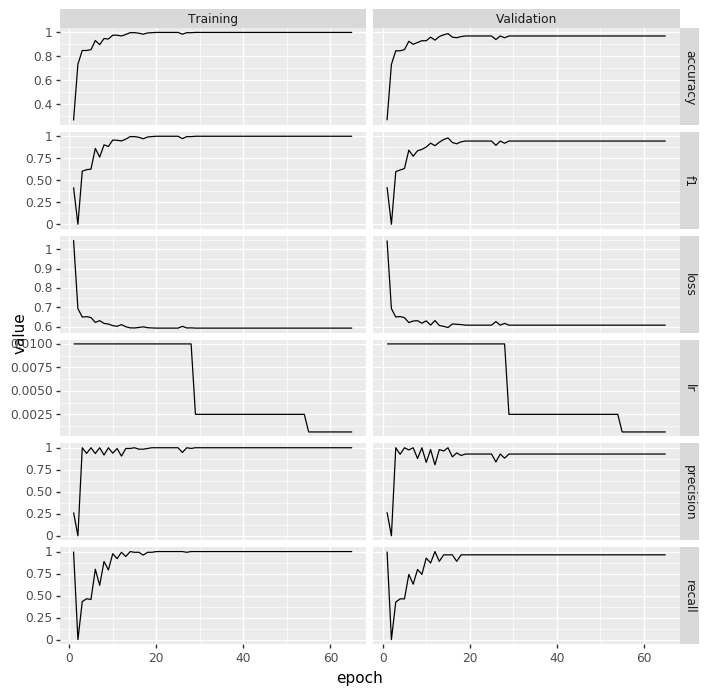

<ggplot: (8727577160189)>

In [50]:
%matplotlib inline
import plotnine as pn
(
    pn.ggplot(
        pd.DataFrame(history).set_index(['epoch', 'type'])
            .rename_axis('metric', axis='columns')
            .stack().rename('value').reset_index()
            .pipe(lambda df: df[df['metric'].isin(['f1', 'loss', 'accuracy', 'lr', 'precision', 'recall'])]),
        pn.aes(x='epoch', y='value')
    ) + 
    pn.geom_line() + 
    pn.facet_grid('metric ~ type', scales='free') + 
    pn.theme(figure_size=(8, 8))
)
